# Cryptocurrencies, stock markets and COVID-19

With more than 18 months into the pandemic, we know that the stock market took an early hit, followed by a fast recovery that led to new all time highs. On the other hand, we saw that Covid was not enough to cancel the crypto-party expected for this year. To see how all these facts check out graphically, we are going to analyze the following series:

- Covid-19 daily evolution of cases and deaths for all 38 OECD countries combined
- The evolution of these stock markets: US 🇺🇸 (S&P500), Germany 🇩🇪 (DAX), Great Britain 🇬🇧 (FTSE 100), Japan 🇯🇵 (Nikkei 225), and Canada 🇨🇦 (S&P/TSX)
- The top 5 cryptocurrencies ranked by their market share: Bitcoin, Ethereum, Binance Coin, Cardano, Solana.

In [1]:
#%%capture
# Install some necessary packages
#!pip install functools
#!pip install fastquant
#!pip install yfinance

In [2]:
# Import the required libraries and set some parameters
import numpy as np
import pandas as pd
import fastquant as fq
from datetime import datetime as dt
import yfinance as yf
from functools import reduce
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
%config InlineBackend.figure_format='retina'

In [3]:
# Import COVID data from Our World in Data
Covid_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [4]:
# Check the dataset
Covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# Keep cuntry ID, date, daily number of cases and daily number of deaths
Covid_data = Covid_data[['iso_code','date','new_cases','new_deaths']]

In [6]:
# Check the new dataset
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127314 entries, 0 to 127313
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   iso_code    127314 non-null  object 
 1   date        127314 non-null  object 
 2   new_cases   120362 non-null  float64
 3   new_deaths  109541 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.9+ MB


In [7]:
# See the list of countries
Covid_data.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

In [8]:
# Generate a list with the 38 OECD countries
OECD_list = ['AUS','AUT','BEL','CAN','CHL','COL','CRI','CZE','DNK','ESP','EST','FIN','FRA','GBR','DEU','GRC','HUN','IRL','ISL',
            'ISR', 'ITA','JPN','KOR','LVA','LTU','LUX','MEX','NLD','NOR', 'POL', 'NZL','PRT','SVK','SVN','SWE','CHE','TUR','USA']

In [9]:
# Make a mask to keep only OECD countries
mask_OECD = Covid_data['iso_code'].apply(lambda x: any(country in x for country in OECD_list))

In [10]:
# Apply the mask and check that we have only kept the desired countries
Covid_OECD = Covid_data[mask_OECD]
Covid_OECD['iso_code'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK',
       'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR',
       'ITA', 'JPN', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR',
       'POL', 'PRT', 'SVK', 'SVN', 'KOR', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA'], dtype=object)

In [11]:
# Generate the OECD sum of cases
Covid_OECD_final = Covid_OECD.groupby('date').agg({'new_cases':'sum', 'new_deaths': 'sum'}).reset_index()
Covid_OECD_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        669 non-null    object 
 1   new_cases   669 non-null    float64
 2   new_deaths  669 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.8+ KB


In [12]:
# Check descriptive statistics
Covid_OECD_final.describe()

,new_cases,new_deaths
count,669.000000,669.000000
mean,175420.683109,3290.325859
std,140438.000047,2637.384045
min,0.000000,-463.000000
25%,61898.000000,1503.000000
50%,131641.000000,2497.000000
75%,275175.000000,4581.000000
max,636945.000000,13012.000000


In [13]:
# Found a negative value that doesn't make sense. I check which date it corresponds to. 
Covid_OECD_final[Covid_OECD_final.new_deaths<0]

,date,new_cases,new_deaths
145,2020-05-25,32464.0,-463.0


The negative death count corresponds to May 25th 2020. I will look for further information on the disaggregated dataset.

In [14]:
Covid_OECD[Covid_OECD.new_deaths<0]

,iso_code,date,new_cases,new_deaths
6786,AUS,2020-06-01,19.0,-1.0
7207,AUS,2021-07-27,207.0,-1.0
7218,AUS,2021-08-07,277.0,-1.0
7450,AUT,2020-07-21,84.0,-1.0
7532,AUT,2020-10-11,896.0,-1.0
...,...,...,...,...
111148,CHE,2021-09-11,0.0,-1.0
111174,CHE,2021-10-07,1125.0,-7.0
111183,CHE,2021-10-16,0.0,-1.0
111184,CHE,2021-10-17,0.0,-1.0


We can see that different days for different countries have a negative value for "confirmed new deaths". This is consistent with the interactive online graph from Our World in data: https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&pickerSort=asc&pickerMetric=location&Metric=Confirmed+deaths&Interval=New+per+day&Relative+to+Population=false&Align+outbreaks=false&country=USA~GBR~CAN~DEU~ITA~IND

It is the case that many countries modified or rechecked their facts with respect to previous days reports. Thefefore, the negative values correspond to rectifications of previous reports. Some of these adjustements are reflected here:
https://www.worldometers.info/coronavirus/#news

In [15]:
# Create two new columns with moving averages
Covid_OECD_final['cases_rolling'] = Covid_OECD_final['new_cases'].rolling(window=7).mean()
Covid_OECD_final['deaths_rolling'] = Covid_OECD_final['new_deaths'].rolling(window=7).mean()
Covid_OECD_final.head(n=10)

,date,new_cases,new_deaths,cases_rolling,deaths_rolling
0,2020-01-01,0.0,0.0,NaN,NaN
1,2020-01-02,0.0,0.0,NaN,NaN
2,2020-01-03,0.0,0.0,NaN,NaN
3,2020-01-04,0.0,0.0,NaN,NaN
4,2020-01-05,0.0,0.0,NaN,NaN
5,2020-01-06,0.0,0.0,NaN,NaN
6,2020-01-07,0.0,0.0,0.0,0.0
7,2020-01-08,0.0,0.0,0.0,0.0
8,2020-01-09,0.0,0.0,0.0,0.0
9,2020-01-10,0.0,0.0,0.0,0.0


In [16]:
# Set date as index
Covid_OECD_final['date'] = pd.to_datetime(Covid_OECD_final['date']) 
Covid_OECD_final.set_index('date', inplace=True)
Covid_OECD_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669 entries, 2020-01-01 to 2021-10-30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_cases       669 non-null    float64
 1   new_deaths      669 non-null    float64
 2   cases_rolling   663 non-null    float64
 3   deaths_rolling  663 non-null    float64
dtypes: float64(4)
memory usage: 26.1 KB


## Stock data

Since we are using Covid data for OECD countries, we are going to compare these data with the stock market index for 5 of the largest economies within this group of countries: US 🇺🇸 (S&P500), Germany 🇩🇪 (DAX), Great Britain 🇬🇧 (FTSE 100), Japan 🇯🇵 (Nikkei 225), and Canada 🇨🇦 (S&P/TSX) 

In [17]:
# Get the data using the yahoo finance library
tickers = ["^GSPC", "^GDAXI", "^FTSE", "^N225", "^GSPTSE"]
from_date = "2020-01-01"
to_date = dt.today()
stocks_data = yf.download(" ".join(tickers), start=from_date, end=to_date)
stocks_data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                           \
                  ^FTSE        ^GDAXI        ^GSPC       ^GSPTSE   
Date                                                               
2020-01-02  7604.299805  13385.929688  3257.850098  17100.000000   
2020-01-03  7622.399902  13219.139648  3234.850098  17066.099609   
2020-01-06  7575.299805  13126.990234  3246.280029  17105.500000   
2020-01-07  7573.899902  13226.830078  3237.179932  17168.099609   
2020-01-08  7574.899902  13320.179688  3253.050049  17167.800781   

                                Close                             \
                   ^N225        ^FTSE        ^GDAXI        ^GSPC   
Date                                                               
2020-01-02           NaN  7604.299805  13385.929688  3257.850098   
2020-01-03           NaN  7622.399902  13219.139648  3234.850098   
2020-01-06  23204.859375  7575.299805  13126.990234  3246.280029   
2020-01-07  23575.720703  7573.899902  13226.830078  3237.179932   
2020-01-08  23204.759766  7574.899902  13320.179688  3253.050049   

                                        ...         Open                \
                 ^GSPTSE         ^N225  ...        ^FTSE        ^GDAXI   
Date                                    ...                              
2020-01-02  17100.000000           NaN  ...  7542.399902  13233.709961   
2020-01-03  17066.099609           NaN  ...  7604.299805  13266.389648   
2020-01-06  17105.500000  23204.859375  ...  7622.399902  13085.490234   
2020-01-07  17168.099609  23575.720703  ...  7575.299805  13199.589844   
2020-01-08  17167.800781  23204.759766  ...  7573.899902  13140.490234   

                                                          Volume              \
                  ^GSPC       ^GSPTSE         ^N225        ^FTSE      ^GDAXI   
Date                                                                           
2020-01-02  3244.669922  17131.599609           NaN  482206700.0  75341400.0   
2020-01-03  3226.360107  17054.800781           NaN  475628900.0  80793400.0   
2020-01-06  3217.550049  17042.300781  23319.759766  516783400.0  71778600.0   
2020-01-07  3241.860107  17119.599609  23320.119141  511576100.0  78282300.0   
2020-01-08  3238.590088  17172.699219  23217.490234  606225000.0  88178800.0   

                                                    
                   ^GSPC       ^GSPTSE       ^N225  
Date                                                
2020-01-02  3.458250e+09  1.562135e+10         NaN  
2020-01-03  3.461290e+09  1.854921e+10         NaN  
2020-01-06  3.674070e+09  1.953518e+10  72800000.0  
2020-01-07  3.420380e+09  1.719358e+10  64300000.0  
2020-01-08  3.720890e+09  2.469801e+10  79400000.0  

[5 rows x 30 columns]

In [18]:
# Keep only the adjusted closing price of each index and add 5 columns representing the 7 day moving average of each index:
stock_markets = stocks_data['Adj Close']
for tick in tickers:
    stock_markets[tick + '_rolling'] = stock_markets[tick].rolling(window=7,min_periods=4).mean()
stock_markets.head(n=10)

,^FTSE,^GDAXI,^GSPC,^GSPTSE,^N225,^GSPC_rolling,^GDAXI_rolling,^FTSE_rolling,^N225_rolling,^GSPTSE_rolling
Date,,,,,,,,,,
2020-01-02,7604.299805,13385.929688,3257.850098,17100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7622.399902,13219.139648,3234.850098,17066.099609,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,7575.299805,13126.990234,3246.280029,17105.500000,23204.859375,NaN,NaN,NaN,NaN,NaN
2020-01-07,7573.899902,13226.830078,3237.179932,17168.099609,23575.720703,3244.040039,13239.722412,7593.974854,NaN,17109.924805
2020-01-08,7574.899902,13320.179688,3253.050049,17167.800781,23204.759766,3245.842041,13255.813867,7590.159863,NaN,17121.500000
2020-01-09,7598.100098,13495.059570,3274.699951,17235.599609,23739.869141,3250.651693,13295.688151,7591.483236,23431.302246,17140.516602
2020-01-10,7587.899902,13483.309570,3265.350098,17234.500000,23850.570312,3252.751465,13322.491211,7590.971331,23515.155859,17153.942801
2020-01-13,7617.600098,13451.519531,3288.129883,17293.400391,NaN,3257.077148,13331.861189,7592.871373,23515.155859,17181.571429
2020-01-14,7622.399902,13456.490234,3283.149902,17352.900391,24025.169922,3263.977121,13365.768415,7592.871373,23600.158203,17222.542969


In [19]:
# Keep only the columns with the rolling averages and rename them:
markets = ['S&P500_US','DAX_GER','LSE_GBR','NIKKEI_JPN','TSX_CAN']
stock_markets = stock_markets.iloc[: , 5:]
stock_markets.columns = markets
stock_markets.head(n=10)

,S&P500_US,DAX_GER,LSE_GBR,NIKKEI_JPN,TSX_CAN
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,3244.040039,13239.722412,7593.974854,NaN,17109.924805
2020-01-08,3245.842041,13255.813867,7590.159863,NaN,17121.500000
2020-01-09,3250.651693,13295.688151,7591.483236,23431.302246,17140.516602
2020-01-10,3252.751465,13322.491211,7590.971331,23515.155859,17153.942801
2020-01-13,3257.077148,13331.861189,7592.871373,23515.155859,17181.571429
2020-01-14,3263.977121,13365.768415,7592.871373,23600.158203,17222.542969


## Crypto data

Even though there are more than 6,000 cryptocurrencies out there, Bitcoin (BTC) remains the face value of the blockchain technology. Together with Ethereum (ETH), they account for roughly 65% of the whole crypto market. The following three cryptocurrencies in terms of market share are Binance Coin (BNB), Cardano (ADA) and Solana (SOL). By incorporating them to the analysis we are accounting for almost 75% of the cryptocurrency market. 

In [20]:
# set tomeframe
from_date = "2019-12-31"
to_date = dt.today().strftime('%Y-%m-%d')

In [21]:
# pull the data
BTC = fq.get_crypto_data("BTC/USDT", from_date, str(to_date))
print('1/5 done')
ETH = fq.get_crypto_data("ETH/USDT", from_date, str(to_date)) 
print('2/5 done')
BNB = fq.get_crypto_data("BNB/USDT", from_date, str(to_date)) 
print('3/5 done')
ADA = fq.get_crypto_data("ADA/USDT", from_date, str(to_date)) 
print('4/5 done')
SOL = fq.get_crypto_data("SOL/USDT", from_date, str(to_date)) 
print('Completed')

1/5 done
2/5 done
3/5 done
4/5 done
Completed


In [22]:
# Keep close price and set time as index
BTC = BTC[['close']].rename(columns={"close": "BTC_close"})
BTC.index.names = ['Date']
ETH = ETH[['close']].rename(columns={"close": "ETH_close"})
ETH.index.names = ['Date']
BNB = BNB[['close']].rename(columns={"close": "BNB_close"})
BNB.index.names = ['Date']
ADA = ADA[['close']].rename(columns={"close": "ADA_close"})
ADA.index.names = ['Date']
SOL = SOL[['close']].rename(columns={"close": "SOL_close"})
SOL.index.names = ['Date']

In [23]:
# Merge all datasets
Coins = [BTC,ETH,BNB,ADA,SOL]
Cryptos = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True,
                                            how='outer'), Coins)
Cryptos.head()

,BTC_close,ETH_close,BNB_close,ADA_close,SOL_close
Date,,,,,
2020-01-01,7200.85,130.77,13.7184,0.03348,NaN
2020-01-02,6965.71,127.19,13.0105,0.03269,NaN
2020-01-03,7344.96,134.35,13.6474,0.03417,NaN
2020-01-04,7354.11,134.20,13.8092,0.03434,NaN
2020-01-05,7358.75,135.37,14.0532,0.03460,NaN


In [24]:
# Check that the merge was correct
Cryptos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 670 entries, 2020-01-01 to 2021-10-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_close  670 non-null    float64
 1   ETH_close  670 non-null    float64
 2   BNB_close  670 non-null    float64
 3   ADA_close  670 non-null    float64
 4   SOL_close  447 non-null    float64
dtypes: float64(5)
memory usage: 31.4 KB


In [25]:
# Create 7 days MA for each coin and keep only the new columns
coins = ['BTC_close','ETH_close','BNB_close','ADA_close','SOL_close']
for coin in coins:
    Cryptos[coin + '_rolling'] = Cryptos[coin].rolling(window=7).mean()
Cryptos = Cryptos.iloc[: , 5:]
Cryptos.head(n=10)

,BTC_close_rolling,ETH_close_rolling,BNB_close_rolling,ADA_close_rolling,SOL_close_rolling
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,7446.808571,135.547143,14.029771,0.034800,NaN
2020-01-08,7568.970000,136.968571,14.146200,0.035204,NaN
2020-01-09,7690.691429,138.475714,14.344386,0.035700,NaN


## Comparing the stock markets and Covid evolution

Now we're ready to visualize what happened to stock markets as Covid waves went on:

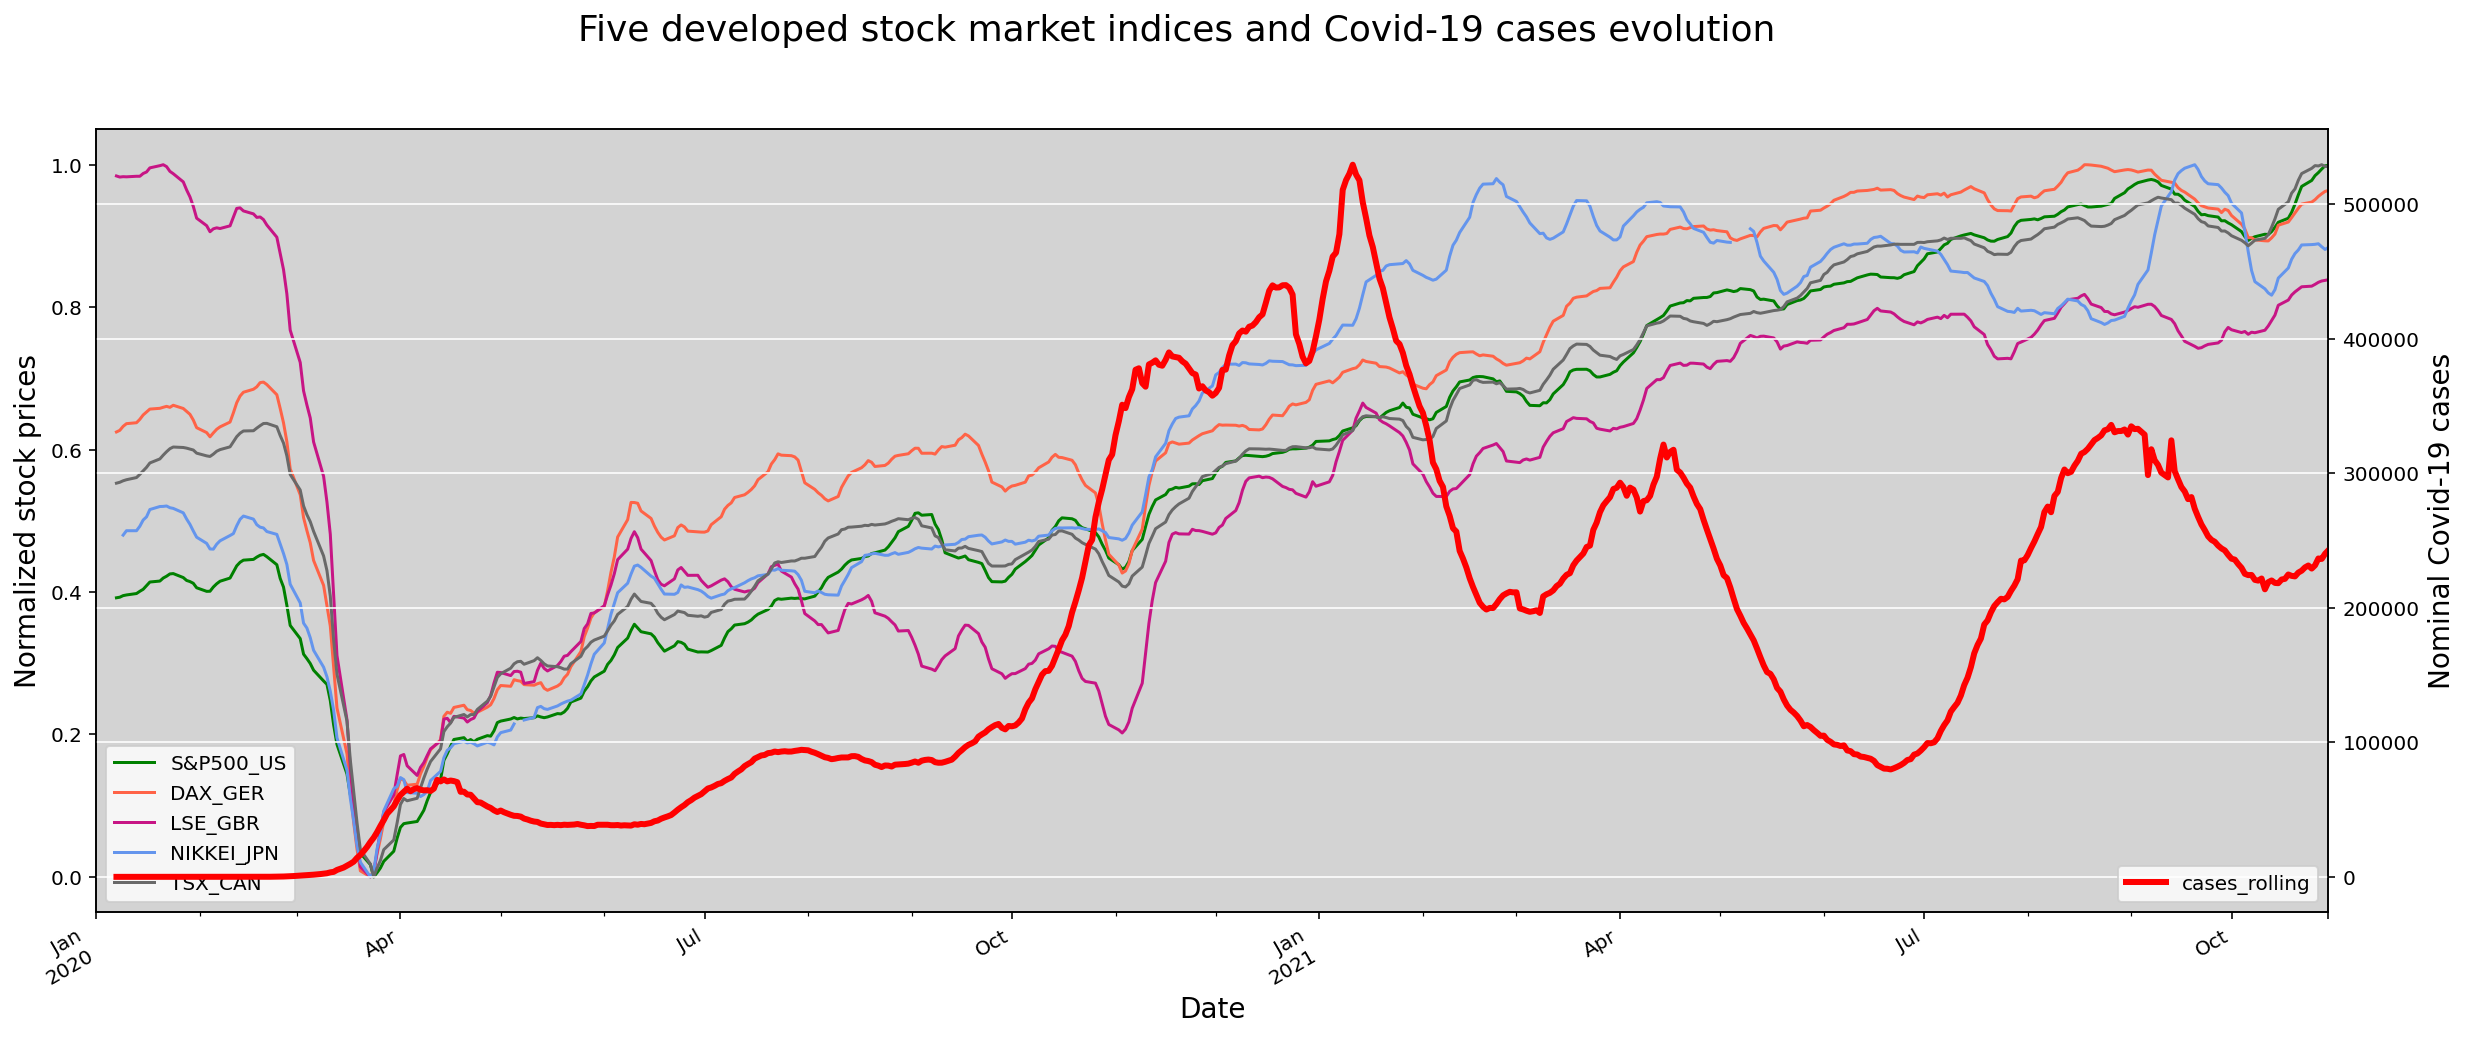

In [26]:
# Plot Covid cases and stock market normalized indices:

tickers = ['S&P500_US','DAX_GER','LSE_GBR','NIKKEI_JPN','TSX_CAN']
colors = ['green','tomato','mediumvioletred','cornflowerblue','dimgray']
ncolor = 0

for tick in tickers:
    # Normalize values
    stock_markets[tick] = (stock_markets[tick] - stock_markets[tick].min()) / (stock_markets[tick].max() - stock_markets[tick].min())
    ax = stock_markets[tick].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
    
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
Covid_OECD_final['cases_rolling'].plot(c = 'red', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('Five developed stock market indices and Covid-19 cases evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized stock prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 cases', fontsize=14)
plt.grid(c='w')

plt.show()

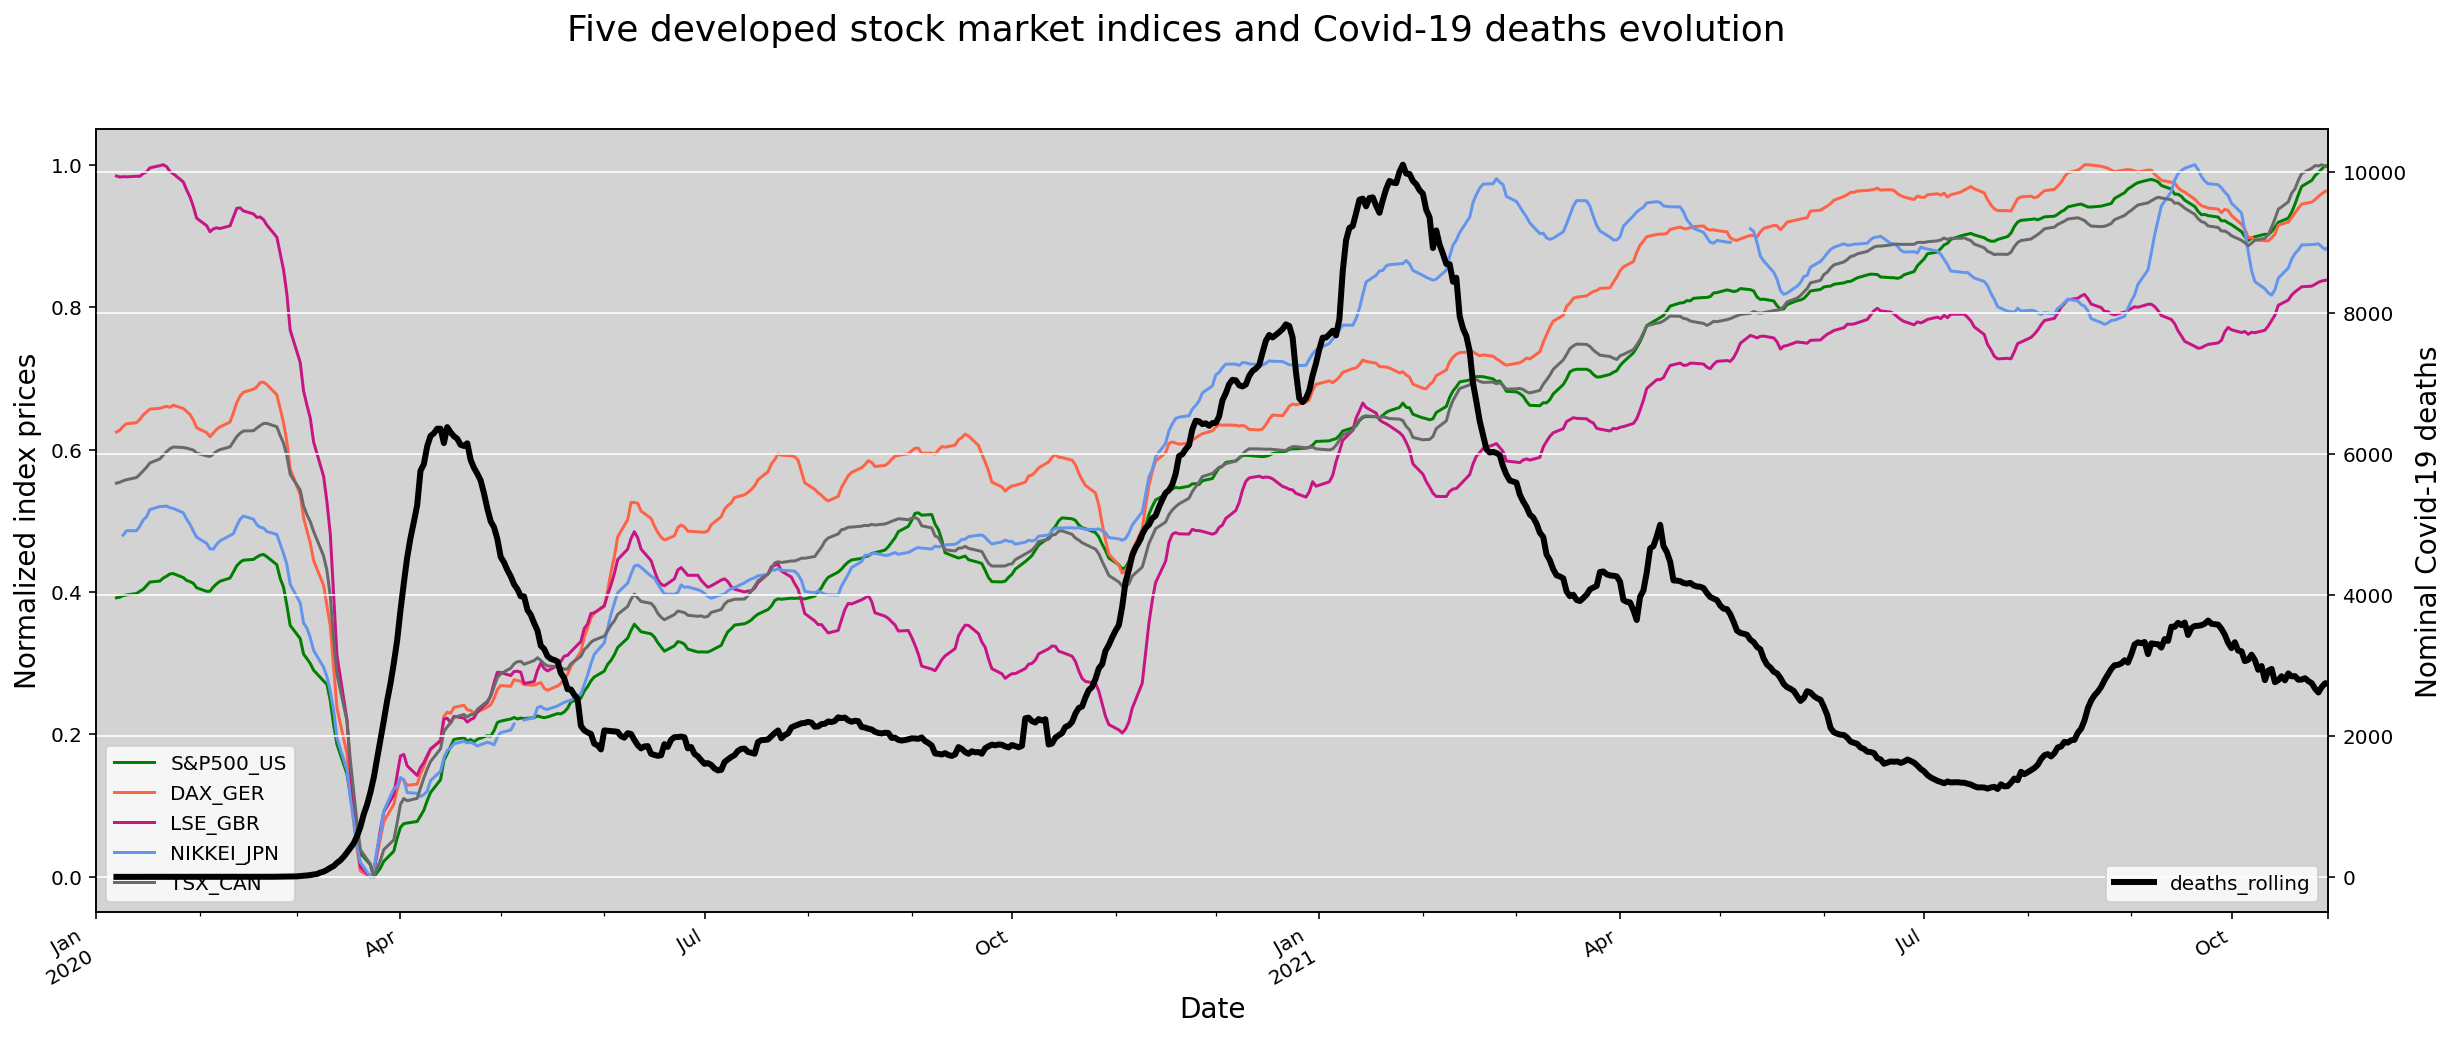

In [27]:
# Plot Covid deaths and stock market normalized indices:

ncolor = 0

for tick in tickers:
    # Normalize values
    stock_markets[tick] = (stock_markets[tick] - stock_markets[tick].min()) / (stock_markets[tick].max() - stock_markets[tick].min())
    ax = stock_markets[tick].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
    
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
ax.set(facecolor = "lightgrey")
Covid_OECD_final['deaths_rolling'].plot(c = 'black', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('Five developed stock market indices and Covid-19 deaths evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized index prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 deaths', fontsize=14)
plt.grid(c='w')
plt.show()

Both plots show a very similar story. By March 2020, investors anticipated that the pandemic would take a toll on the Economy, although it was not clear through which channels. The first restriction announcements, mask wearing mandates, and level of danger Covid represented were not clear. The way societies adapted to the pandemic depended heavily on the country. We can clearly see that the first wave of deaths spiked very fast, most likely due to how difficult it was to adapt the available resources to the suddenly collapsed ICUs.

It can be fairly argued that what came after for stock markets would have been difficult to predict. Before the deadliest Covid wave, which took place between October 2020 and January 2021, markets experienced a sharp recovery, with the exception of Canada. The US northern neighbor was not as optimistic as the rest after an initial fast rebound. We can also observe a general downtrend coinciding with the beginning of the second wave, almost immediately followed by a bull rally towards new all time highs. The vaccine campaign started in late December 2020, and during January 2021 we can see a very sharp decrease in both the amount of cases and deaths. By then, markets were operating at higher levels than before the pandemic, with the exception of Canada.

Since we are working with indices, it is necessary to take into account that there are winners and losers in the Covid era markets. The recovery was mostly led by technological companies, as the online world was instrumental to navigate the imposed restrictions. On the other hand, we have companies like airlines and those related to tourism, which are the ones that took the heaviest toll. Overall, Covid-19 has actually mattered to some markets more than others, such as the value style and related sectors.

## Comparing the crypto market and Covid evolution

Let's visualize how covid waves and cryptocurrency prices evolved:

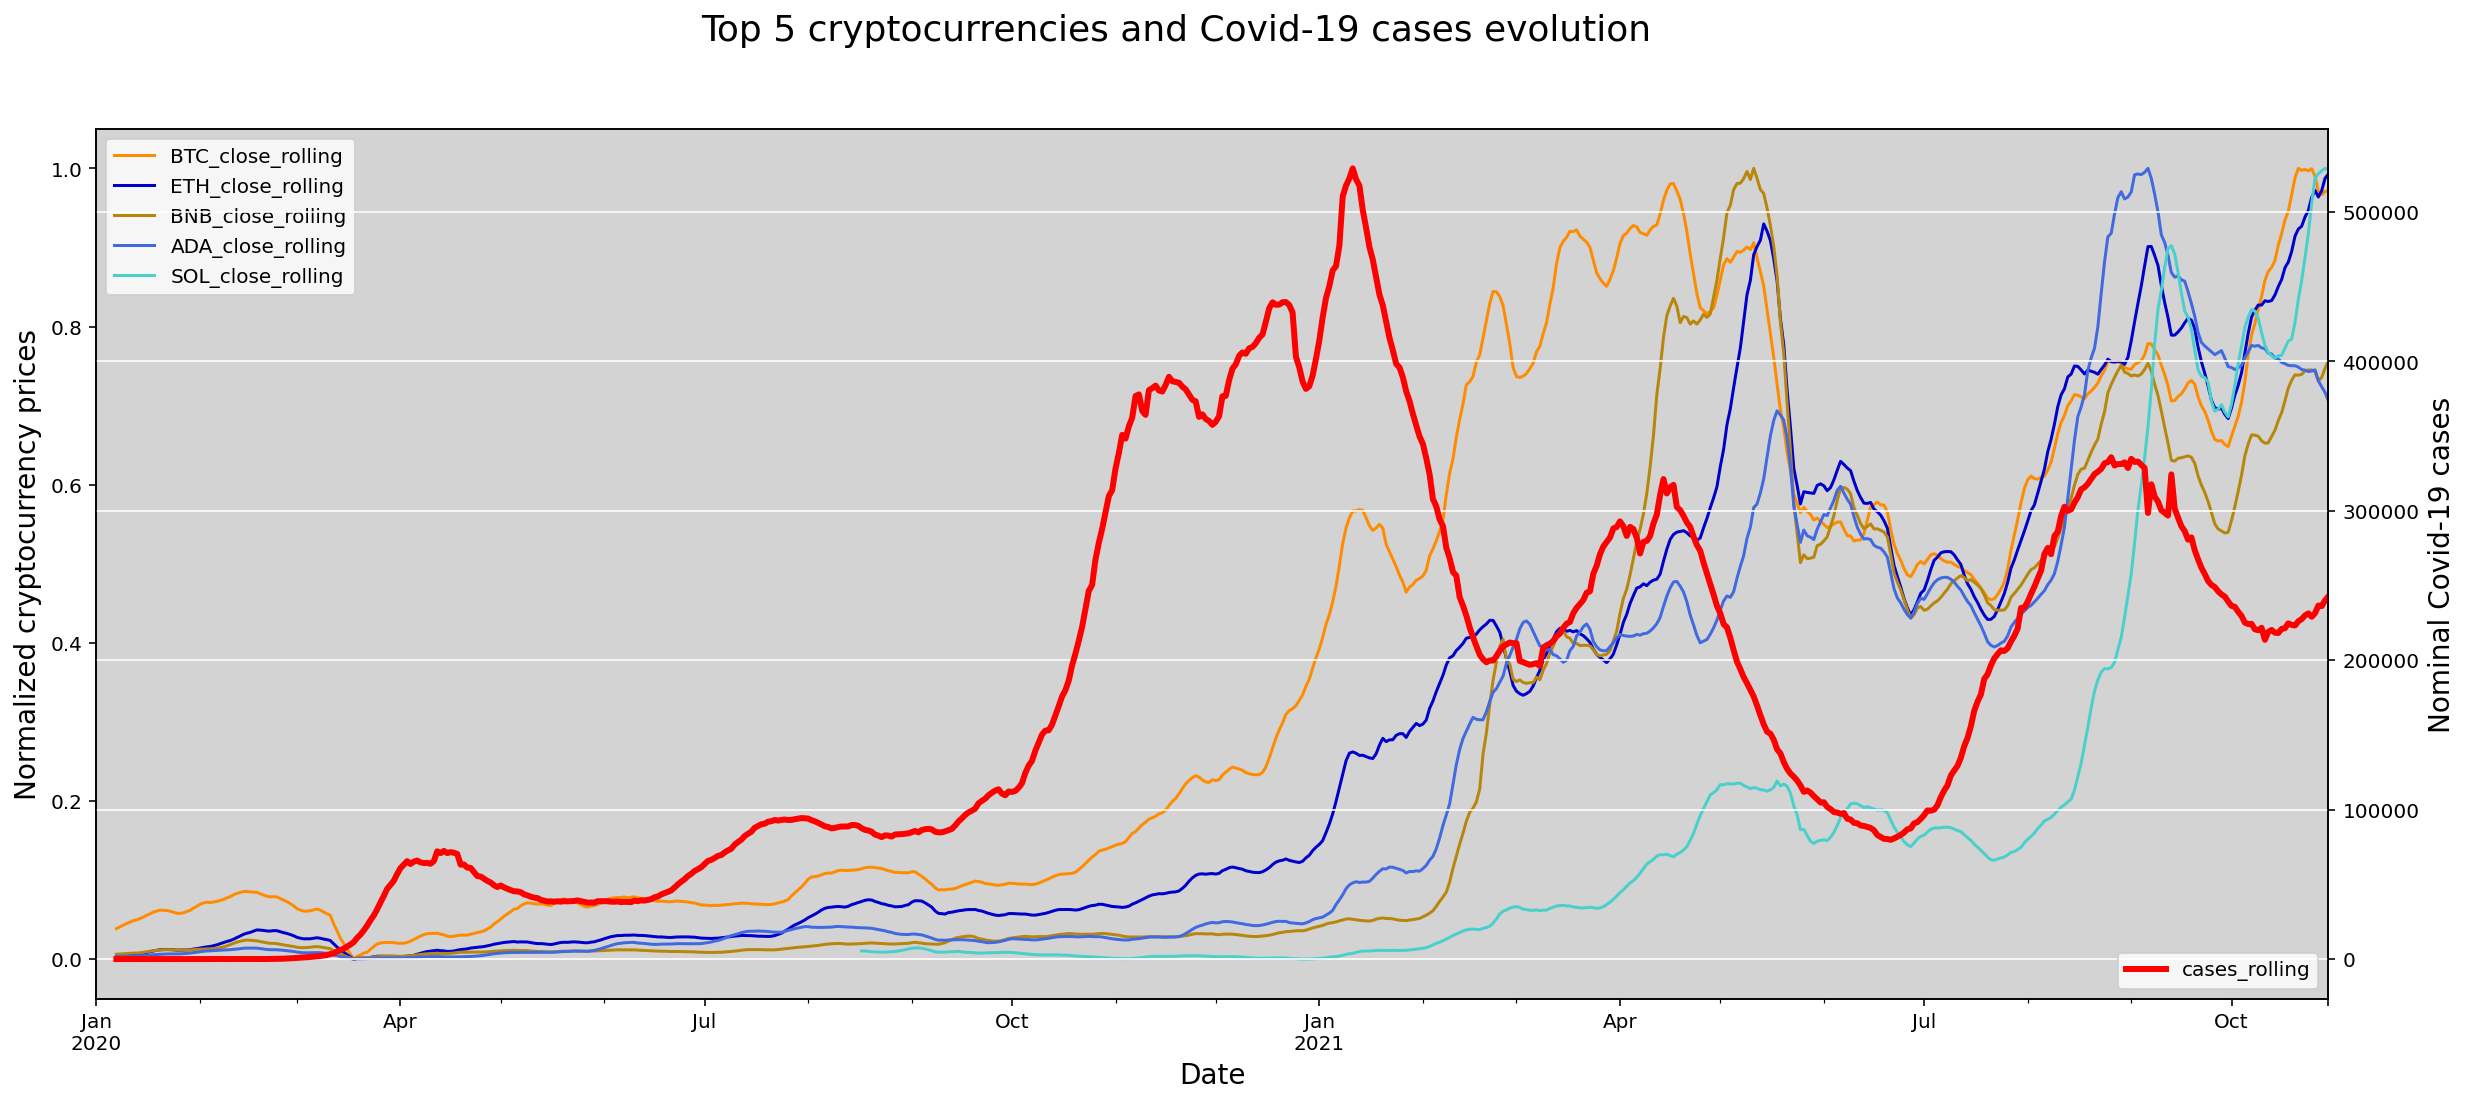

In [28]:
# Plot Covid cases and normalized cryptocurrency prices:

Coins = ['BTC_close_rolling','ETH_close_rolling','BNB_close_rolling','ADA_close_rolling','SOL_close_rolling']
colors = ['darkorange','mediumblue','darkgoldenrod','royalblue','mediumturquoise']
ncolor = 0

for coin in Coins:
    # Normalize values
    Cryptos[coin] = (Cryptos[coin] - Cryptos[coin].min()) / (Cryptos[coin].max() - Cryptos[coin].min())
    ax = Cryptos[coin].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
    
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
Covid_OECD_final['cases_rolling'].plot(c = 'red', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('Top 5 cryptocurrencies and Covid-19 cases evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized cryptocurrency prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 cases', fontsize=14)
plt.grid(c='w')
plt.show()

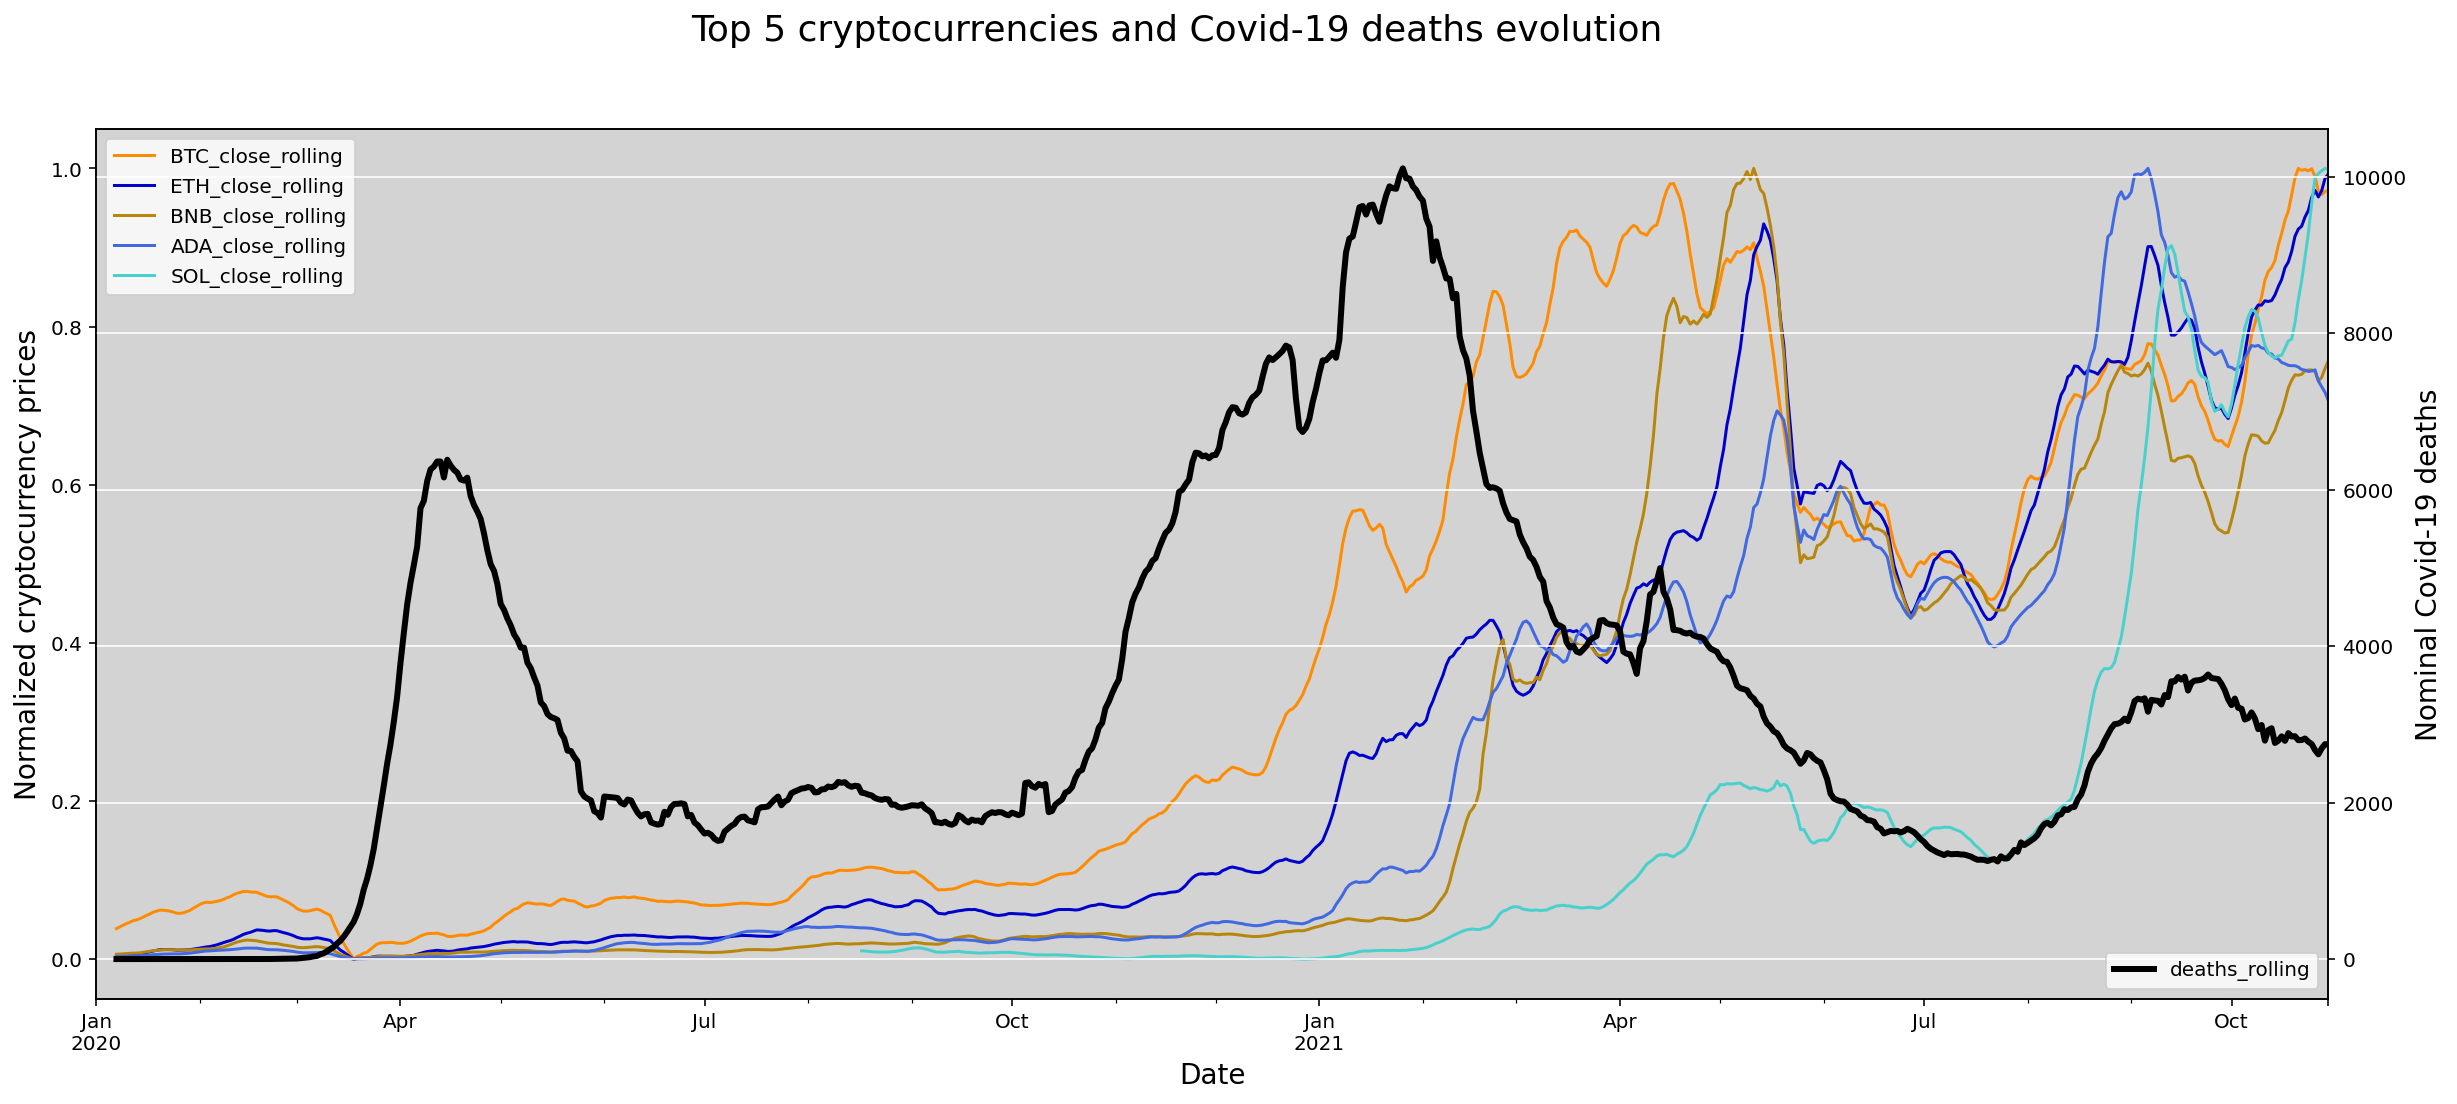

In [29]:
# Plot Covid deaths and normalized cryptocurrency prices:

ncolor = 0

for coin in Coins:
    # Normalize values
    Cryptos[coin] = (Cryptos[coin] - Cryptos[coin].min()) / (Cryptos[coin].max() - Cryptos[coin].min())
    ax = Cryptos[coin].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
    
ax1 = ax.twinx()
ax.set(facecolor = "lightgrey")
Covid_OECD_final['deaths_rolling'].plot(c = 'black', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('Top 5 cryptocurrencies and Covid-19 deaths evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized cryptocurrency prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 deaths', fontsize=14)
plt.grid(c='w')
plt.show()

Like with stocks, it only makes sense to study both graphs together. It could be tempting to comment on how crypto prices woke up during the second wave of Covid, or how the price crashed before the third wave. However, the most likely scenario is that we found a spurious correlation to share here: https://www.tylervigen.com/spurious-correlations

Approximately every four years, the reward for mining Bitcoin is cut in half. More precisely, this happens every 210,000 BTC mined out of the 21,000,000 that will ever exist. This deflationary feature is a property of the blockchain network on which Bitcoin works. BTC last halved on May 11, 2020, around 3 p.m. EST, resulting in a block reward of 6.25 BTC. The previous two halvings took place in 2012 and 2012, both leading respectively to the 2013 and 2016 bull runs. These bull runs have been followed by crashes. The crashes have been followed by long “crypto winters” where sentiment is at its lowest and major news networks suddenly lose interest in Bitcoin. Until the next halving cycle starts the process again. 2021 was expected to be a continuation of this tendency, and it did not disappoint. 

It’s always hard to know exactly what is driving crypto prices. Some analysts would refer to crypto investors as a GameStop like cult. However, the 2021 bull run is giving signs of slow mainstream cryptocurrency adoption, with big companies -like Tesla and MicroStrategy- and names -Elon Musk, Jack Dorsey, Cathie Wood, etc- endorsing them. Additionally different types of ETFs for several cryptocurrencies have been approved in the US. Hence, cryptos are most likely here to stay.

Overall, there is a U-inverted shape between the evolution of cryptocurrencies prices and both the number of Covid-19 cases and deaths. Although there are several hypotheses, there is no conclusive evidence to link the evolution of these variables. More research will be needed to understand what are the drivers behind investment decisions on crypto markets.